## Filters

In image processing, filters are used to filter out unwanted or irrelevant information in an image, or to amplify features like object boundaries or other distinguishing traits.

## Frequency in images

Frequency in images is a rate of change. A high frequency image is one where the intensity changes a lot, and the level of brightness changes quickly from one pixel to the next. A low frequency image may be one that is relatively uniform in brightness or changes very slowly. High-frequency components also correspond to the edges of objects in images, which can help us classify those objects.

![High and low frequency images](images/high-low_frequency.png)

## High-Pass Filters

High pass filters are used to make an image appear sharper and enchance high-frequency parts of an image: neighboring pixels rapidly change, like from very dark to very light pixels. Since these are patterns of intensity, the these filters will operate on grayscale images that represent this information and display patterns of lightness and darkness in a simple format. 

In areas where a pixel is way brighter than its immediate neighbors, the high-pass filter will enhance that change and create a line. This emphasizes edges, which are areas in an image where the intensity changes very quickly, and often indicate object boundaries.

![Lena](images/lena_edges.png)

## Convolution Kernels

A kernel is a matrix of numbers that modifies and image. An example of an edge detection filter is the laplacian: 

$\left( \begin{matrix} 0&-1&0\\ -1&4&-1 \\ 0&-1&0 \end{matrix} \right)$

It is a three by three kernel whose elements all sum to zero. It is important that these kernels sum to zero, because they calculate the differente or change between neighboring pixels. Differences are calculated by substracting pixel values from one another. In this case, substracting the value of the pixels that surround a center pixel. To apply this kernel, an image is convolved with this kernel.

A convolution is performed by taking a kernel and passing it over an image pixel by pixel, transforming it based on these numbers.

![Convolution](images/Convolution.png)

## Creating a Filter, Edge Detection

### Import resources and display image

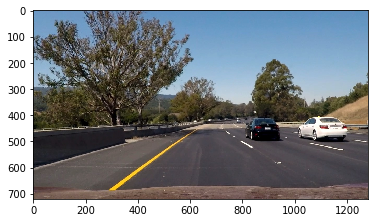

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image_road = cv2.imread('images/bridge_trees_example.jpg')
image_road = cv2.cvtColor(image_road, cv2.COLOR_BGR2RGB)

plt.imshow(image_road)### Import resources and display image

### Convert the image to grayscale

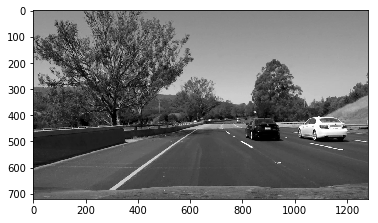

In [2]:
# Convert to grayscale for filtering
gray_road = cv2.cvtColor(image_road, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_road, cmap='gray')

### Create and apply a custom kernel

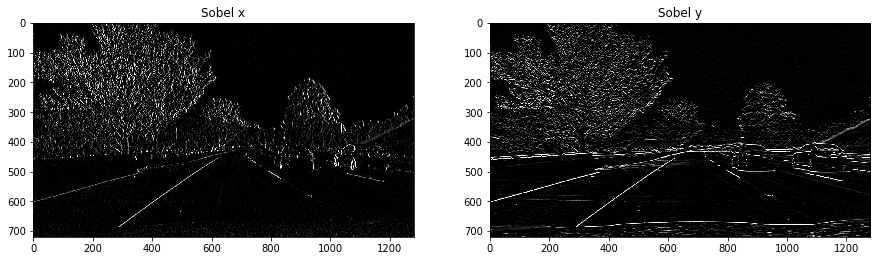

In [3]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

filtered_road_x = cv2.filter2D(gray_road, -1, sobel_x)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_road_y = cv2.filter2D(gray_road, -1, sobel_y)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_title('Sobel x')
ax1.imshow(filtered_road_x, cmap='gray')

ax2.set_title('Sobel y')
ax2.imshow(filtered_road_y, cmap='gray')

### Create binary images

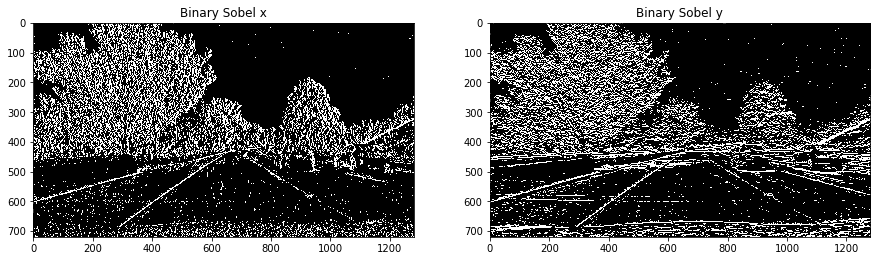

In [4]:
retval, binary_image_x = cv2.threshold(filtered_road_x, 10, 255, cv2.THRESH_BINARY)
retval, binary_image_y = cv2.threshold(filtered_road_y, 10, 255, cv2.THRESH_BINARY)

f2, (ax21,ax22) = plt.subplots(1, 2, figsize=(15,5))
ax21.set_title('Binary Sobel x')
ax21.imshow(binary_image_x, cmap='gray')

ax22.set_title('Binary Sobel y')
ax22.imshow(binary_image_y, cmap='gray')

## Low-pass filters

Noise in an image is generally seen as speckles or discoloration in an image, which usually does not contain useful information. It may even affect the outcome of image processing steps; high-pass filters can amplify the noise if it not removed first. Low-pass filters are used to remove this noise. They block certain high frequency content and blur or smooth the appearance of the image, reducing high frequency noise.

The simples low-pass filter is the averaging kernel: 

$\frac{1}{9} \left( \begin{matrix} 1&1&1\\ 1&1&1 \\ 1&1&1 \end{matrix} \right)$

These filters typically take an average of neighboring pixels, and not a difference.

### Gaussian Blur

Unlike the averaging kernel, the Gaussian blur kernel blurs the image, while also preserving edge information, making it, perhaps, the most frequently used filter in computer vision. It is essentially a weighted average that gives the most weight to the center, while also considering the surrounding pixels.

$\frac{1}{16} \left( \begin{matrix} 1&2&1\\ 2&4&2 \\ 1&2&1 \end{matrix} \right)$

### Gaussian blur an image

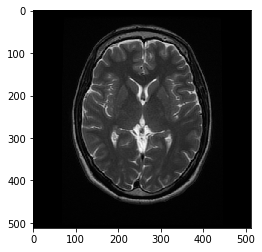

In [5]:
# blurring is often used in medical applications that have too much noise
image_brain = cv2.imread('images/brain_MR.jpg')

gray_brain = cv2.cvtColor(image_brain, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_brain, cmap='gray')### Import resources and display image

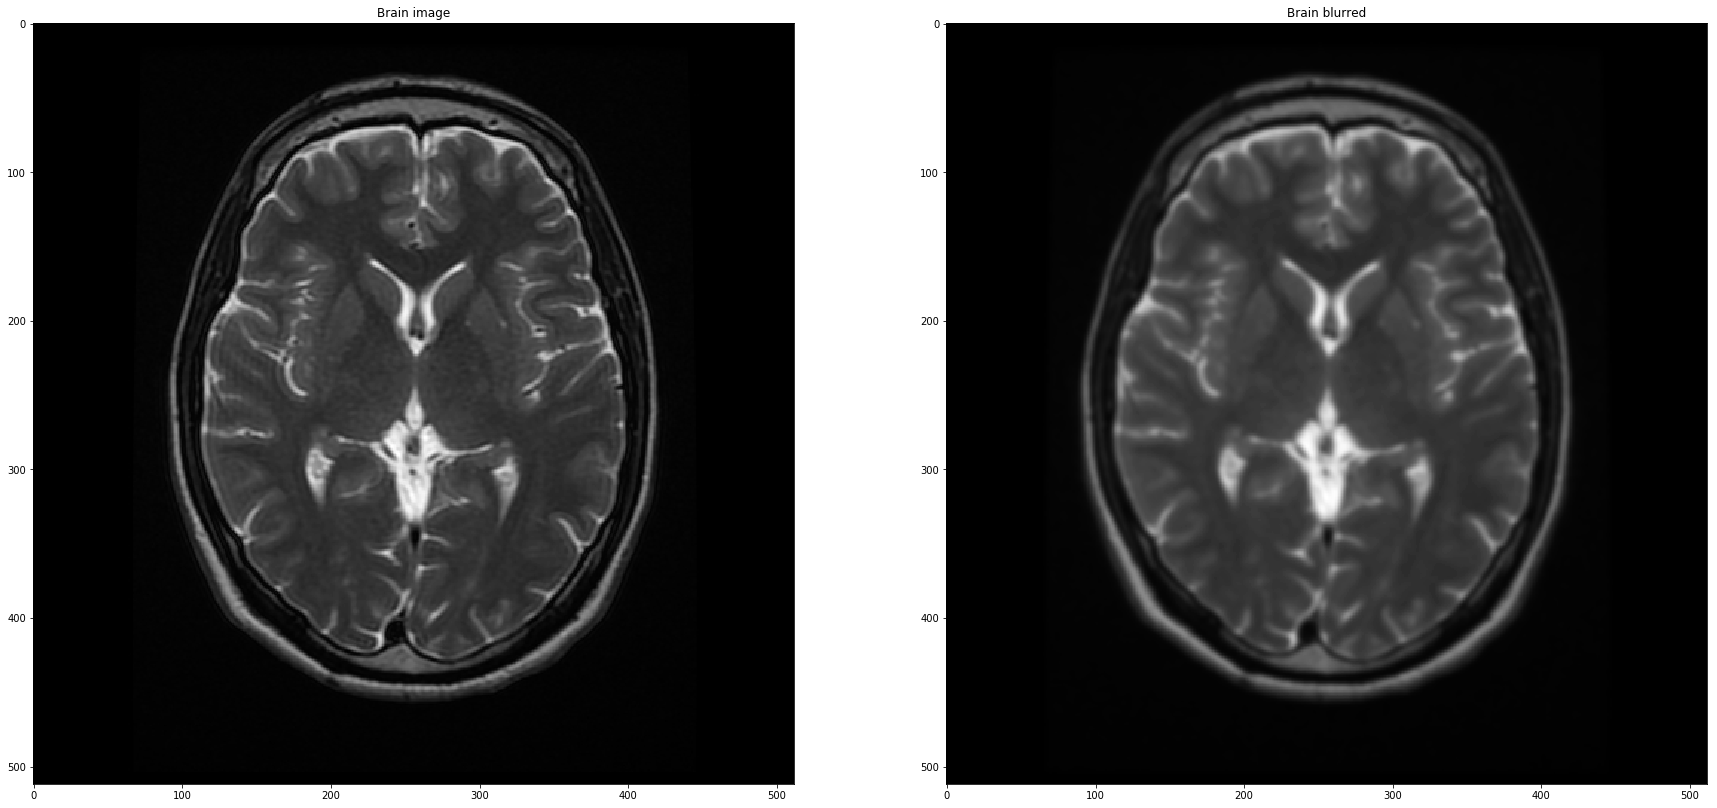

In [6]:
# take the gray scale road image and apply a gaussian blur
# the kernel has to be of odd dimensions so that it can be centered at each pixel
gray_brain_blur = cv2.GaussianBlur(gray_brain, (9,9), 0)

f3, (ax31,ax32) = plt.subplots(1, 2, figsize=(30,20))
ax31.set_title('Brain image')
ax31.imshow(gray_brain, cmap='gray')

ax32.set_title('Brain blurred')
ax32.imshow(gray_brain_blur, cmap='gray')

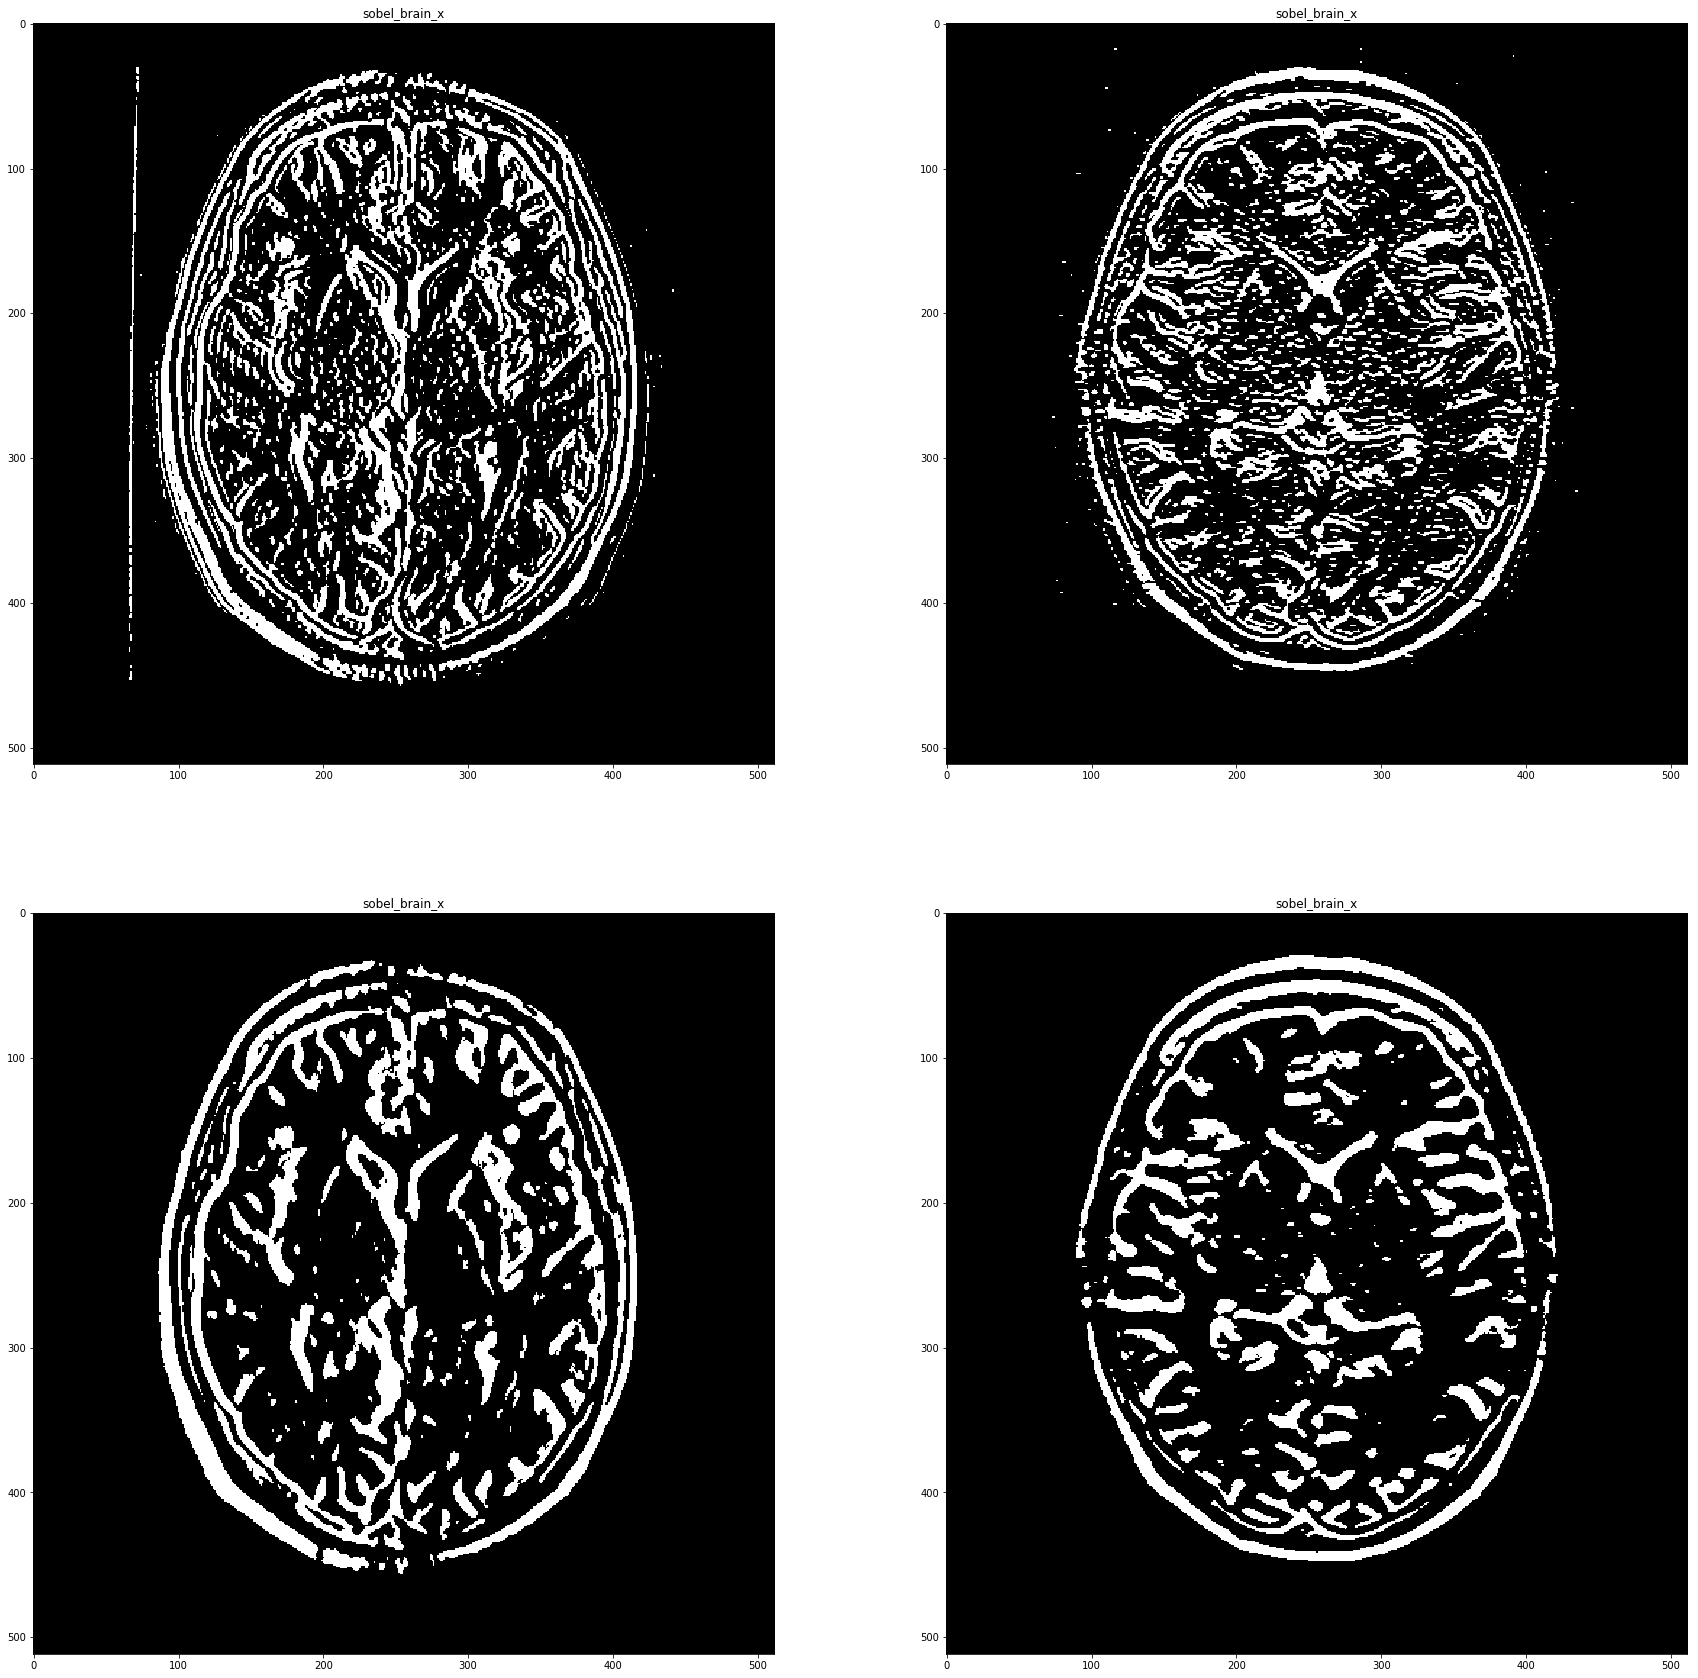

In [7]:
# apply sobel x and y to both images 
sobel_brain_x = cv2.filter2D(gray_brain, -1, sobel_x) 
sobel_brain_y = cv2.filter2D(gray_brain, -1, sobel_y)

sobel_brain_blur_x = cv2.filter2D(gray_brain_blur, -1, sobel_x) 
sobel_brain_blur_y = cv2.filter2D(gray_brain_blur, -1, sobel_y)

# apply a threshold and compare the noise
retval, binary_brain_x = cv2.threshold(sobel_brain_x, 10, 255, cv2.THRESH_BINARY)
retval, binary_brain_y = cv2.threshold(sobel_brain_y, 10, 255, cv2.THRESH_BINARY)

retval, binary_brain_blur_x = cv2.threshold(sobel_brain_blur_x, 10, 255, cv2.THRESH_BINARY)
retval, binary_brain_blur_y = cv2.threshold(sobel_brain_blur_y, 10, 255, cv2.THRESH_BINARY)

f4, ((ax41,ax42), (ax43, ax44)) = plt.subplots(2, 2, figsize=(30,30))

ax41.set_title('sobel_brain_x')
ax41.imshow(binary_brain_x, cmap='gray')

ax42.set_title('sobel_brain_x')
ax42.imshow(binary_brain_y, cmap='gray')

ax43.set_title('sobel_brain_x')
ax43.imshow(binary_brain_blur_x, cmap='gray')

ax44.set_title('sobel_brain_x')
ax44.imshow(binary_brain_blur_y, cmap='gray')

## Canny edge detection

Even with low pass and high pass filters, edge detection is still a very complex problem. We have to think about what level of intensity change constitutes an edge and how we can consistently detect and represent both thin and thick edges. One of the best and most frequently used edge detectors that takes all of these questions into account is the canny edge detector.

Canny edge detection goes through a series of steps that consistently produce accurately detected edges.

1. It filters out noise using a Gaussian blur.
2. It finds the strength and direction of edges in an image using Sobel filters.
3. Using the output of the Sobel filters Canny then applies non-maximum suppression which looks at the strength and direction of each detected edge and selects the local maximum pixel to create consistent one pixel wide thin lines that align with the strongest edges.
4. Finally, it uses a process called hysteresis thresholding to isolate the best edges.

![Hysteresis](images/hysteresis_thresholding.jpg)

### Implementing Canny edge detection

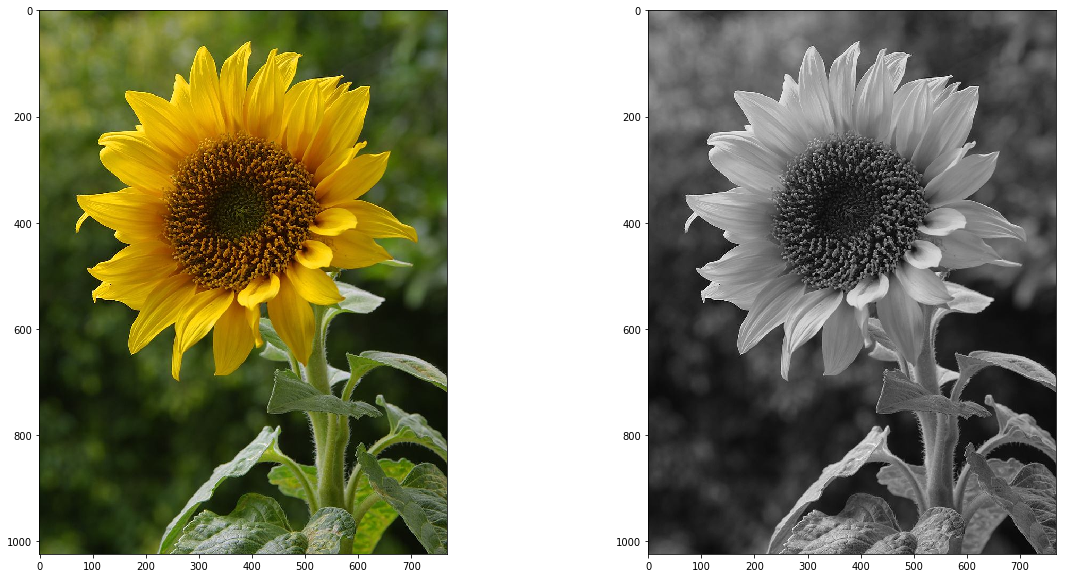

In [16]:
# load an image
sunflower_image = cv2.imread('images/sunflower.jpg')
sunflower_image_copy = cv2.cvtColor(sunflower_image, cv2.COLOR_BGR2RGB)

# convert to grayscale
sunflower_gray = cv2.cvtColor(sunflower_image_copy, cv2.COLOR_RGB2GRAY)

# display both images
f5, (ax51,ax52) = plt.subplots(1, 2, figsize=(20,10))

ax51.imshow(sunflower_image_copy)
ax52.imshow(sunflower_gray, cmap="gray")

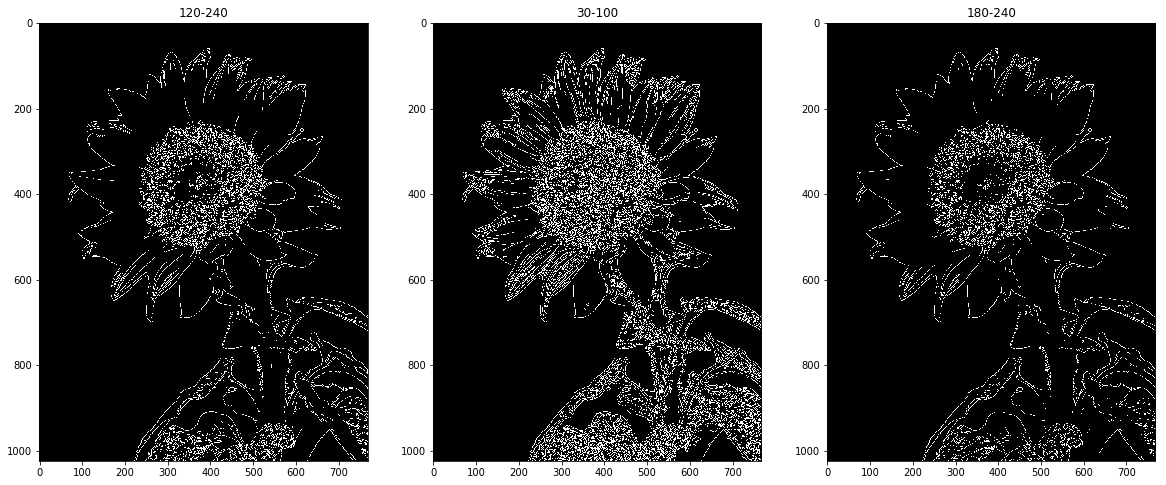

In [24]:
# define lower and upper thresholds for hysteresis
lower = 120
upper = 240

sunflower_edges = cv2.Canny(sunflower_gray, lower, upper)

# plot the first canny edge detected image
f6, (ax61,ax62, ax63) = plt.subplots(1, 3, figsize=(20,10))
ax61.set_title('120-240')
ax61.imshow(sunflower_edges, cmap = 'gray')

# plot the edge detection with different thresholds
sunflower_edges = cv2.Canny(sunflower_gray, 30, 100)
ax62.set_title('30-100')
ax62.imshow(sunflower_edges, cmap = 'gray')

sunflower_edges = cv2.Canny(sunflower_gray, 180, 240)
ax63.set_title('180-240')
ax63.imshow(sunflower_edges, cmap = 'gray')

 Canny detects boundaries quite well, and produces a binary image within the lines. This becomes very useful when we want to select a certain area of interest to mask or further analyze.